## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
import sklearn.metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
import copy
import os
import shutil
import urllib.request
import csv
import pandas as pd
from scipy.stats import bootstrap
import statistics
from PIL import Image
import warnings

from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, hamming_loss,silhouette_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import os
import xgboost as xgb
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.model_selection import train_test_split


### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
frogs = pd.read_csv('../Data/Anuran Calls (MFCCs)/Frogs.csv')
frogs

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
types = []
for i in frogs.columns:
    types.append(type(frogs[i][2]))
pd.unique(types)
type(frogs['RecordID'][7])

numpy.int64

In [4]:
# Separate the features (X) and labels (y)
X = frogs.iloc[:, :-4]
y = frogs[['Family', 'Genus', 'Species']]
y_family = frogs['Family']
y_genus = frogs['Genus']
y_species = frogs['Species']

# Split the data into training and testing sets, with 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y.columns

Index(['Family', 'Genus', 'Species'], dtype='object')

### (b) Train a classifier for each label

#### (i) Research

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train one SVM classifier for each label
classifiers = {}
predictions = pd.DataFrame(index=X_test.index, columns=y.columns)

for label in y.columns:
    classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
    classifier.fit(X_train_scaled, y_train[label])
    classifiers[label] = classifier
    predictions[label] = classifier.predict(X_test_scaled)

# Convert predictions to binary indicator format
mlb = MultiLabelBinarizer()
y_test_binarized = mlb.fit_transform(y_test.values)
predictions_binarized = mlb.transform(predictions.values)

# Calculate Exact Match Ratio
exact_match_ratio = np.all(y_test_binarized == predictions_binarized, axis=1).mean()
print(f"Exact Match Ratio: {exact_match_ratio}")

# Calculate Hamming Loss
hamming_loss_score = hamming_loss(y_test_binarized, predictions_binarized)
print(f"Hamming Loss: {hamming_loss_score}")

Exact Match Ratio: 0.9810097267253358
Hamming Loss: 0.004000168428144343


#### (ii) Train a SVM for each of the labels

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train an SVM for each label
for label in y.columns:
    t1 = datetime.now()  # start timer

    print("Training SVM for label:", label)

    # Define the parameter grid to search over
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100,1000],
        'gamma': [0.01, 0.1, 1, 10]
    }

    # Perform 10-fold cross validation to find the best parameters
    grid_search = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid, cv=10)
    grid_search.fit(X_train_std, y_train[label])

    # Print the best parameters and time taken
    print("Best parameters:", grid_search.best_params_)

    # Train the SVM with the best parameters on the full training set
    best_svc = grid_search.best_estimator_
    best_svc.fit(X_train_std, y_train[label])

    # Evaluate the SVM on the test set
    y_pred = best_svc.predict(X_test_std)
    #print(y_pred)
    #print(y_test[label])
    # Calculate the Hamming Loss
    hl = hamming_loss(y_test[label], y_pred)
    print("Hamming Loss:", hl)

    # Calculate the Hamming Score
    print("Hamming score:", 1-hl)

    # Calculate the Exact Match Ratio (EMR)
    emr = accuracy_score(y_test[label], y_pred)
    print("EMR:", emr)

    t2 = datetime.now()  # stop timer
    print("Time taken:", t2 - t1)

Training SVM for label: Family
Best parameters: {'C': 10, 'gamma': 0.1}
Hamming Loss: 0.007410838351088467
Hamming score: 0.9925891616489115
EMR: 0.9925891616489115
Time taken: 0:03:34.403849
Training SVM for label: Genus
Best parameters: {'C': 10, 'gamma': 0.1}
Hamming Loss: 0.012042612320518759
Hamming score: 0.9879573876794813
EMR: 0.9879573876794813
Time taken: 0:05:24.481931
Training SVM for label: Species
Best parameters: {'C': 1000, 'gamma': 0.01}
Hamming Loss: 0.010653080129689671
Hamming score: 0.9893469198703103
EMR: 0.9893469198703103
Time taken: 0:04:58.755625


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [7]:
from sklearn.svm import LinearSVC

# Train an L1-penalized SVM for each label
for label in y.columns:
    t1 = datetime.now()  # start timer

    print("Training L1-penalized SVM for label:", label)
    
    # Define the parameter grid to search over
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100]
    }
    
    # Perform 10-fold cross validation to find the best penalty weight
    grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=10000), param_grid, cv=10)
    grid_search.fit(X_train_std, y_train[label])
    
    # Print the best penalty weight
    print("Best penalty weight:", grid_search.best_params_)
    
    # Train the L1-penalized SVM with the best penalty weight on the full training set
    best_svc = grid_search.best_estimator_
    best_svc.fit(X_train_std, y_train[label])
    
    # Evaluate the L1-penalized SVM on the test set
    y_pred = best_svc.predict(X_test_std)
    # Calculate the Hamming Loss
    hl = hamming_loss(y_test[label], y_pred)
    print("Hamming Loss:", hl)

    # Calculate the Hamming Score
    print("Hamming score:", 1-hl)

    # Calculate the Exact Match Ratio (EMR)
    emr = accuracy_score(y_test[label], y_pred)
    print("EMR:", emr)

    t2 = datetime.now()  # stop timer
    print("Time taken:", t2 - t1)

Training L1-penalized SVM for label: Family
Best penalty weight: {'C': 1}
Hamming Loss: 0.07132931912922649
Hamming score: 0.9286706808707735
EMR: 0.9286706808707735
Time taken: 0:00:25.496829
Training L1-penalized SVM for label: Genus


C:\Users\Haoran Zhang\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Haoran Zhang\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best penalty weight: {'C': 10}
Hamming Loss: 0.058360352014821676
Hamming score: 0.9416396479851783
EMR: 0.9416396479851783
Time taken: 0:00:55.197059
Training L1-penalized SVM for label: Species


C:\Users\Haoran Zhang\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Haoran Zhang\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best penalty weight: {'C': 10}
Hamming Loss: 0.04075961093098657
Hamming score: 0.9592403890690134
EMR: 0.9592403890690134
Time taken: 0:00:59.818733


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define the parameter grid to search over
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1, 10]
}


# Train an SVM for each label using SMOTE
for label in y.columns:
    t1 = datetime.now()  # start timer

    print("Training SVM for label:", label)
    
    # Define the pipeline to include SMOTE and SVM
    pipeline = Pipeline([
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
        ('svm', SVC(kernel='rbf', decision_function_shape='ovr'))
    ])
    
    # Perform 10-fold cross validation to find the best parameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=10)
    grid_search.fit(X_train_std, y_train[label])
    
    # Print the best parameters
    print("Best parameters:", grid_search.best_params_)
    
    # Train the SVM with the best parameters on the full training set
    best_svc = grid_search.best_estimator_
    best_svc.fit(X_train_std, y_train[label])
    
    # Evaluate the SVM on the test set
    y_pred = best_svc.predict(X_test_std)
    # Calculate the Hamming Loss
    hl = hamming_loss(y_test[label], y_pred)
    print("Hamming Loss:", hl)

    # Calculate the Hamming Score
    print("Hamming score:", 1-hl)

    # Calculate the Exact Match Ratio (EMR)
    emr = accuracy_score(y_test[label], y_pred)
    print("EMR:", emr)

    t2 = datetime.now()  # stop timer
    print("Time taken:", t2 - t1)

Training SVM for label: Family
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}
Hamming Loss: 0.006947660954145438
Hamming score: 0.9930523390458545
EMR: 0.9930523390458545
Time taken: 0:07:17.491301
Training SVM for label: Genus
Best parameters: {'svm__C': 10, 'svm__gamma': 0.1}
Hamming Loss: 0.010653080129689671
Hamming score: 0.9893469198703103
EMR: 0.9893469198703103
Time taken: 0:25:33.368328
Training SVM for label: Species
Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Hamming Loss: 0.012042612320518759
Hamming score: 0.9879573876794813
EMR: 0.9879573876794813
Time taken: 0:30:39.405453


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [9]:
import itertools
import random
from sklearn import metrics


# Perform the procedure 50 times
n_iter = 50
hamming_distances = {label: [] for label in y.columns}
for i in range(n_iter):
    # Find optimal number of clusters using Silhouette score
    silh_avg = {}
    t1 = datetime.now()  # start timer

    for k in range(2,21):
        rand_value=random.randint(0, 100)
        k_means = KMeans(n_clusters=k,init='k-means++',random_state=rand_value).fit(X)
        labels = k_means.labels_
        silh_avg.update({k:(metrics.silhouette_score(X, labels))})
   
    print("Iteration : ",i)

    # Get optimal k and build K-means clustering with it
    optimal_k = max(silh_avg,key=silh_avg.get)
    rand_value=random.randint(0, 900)
    print('optimal_k is:',optimal_k)
    t2 = datetime.now()  
    print(t2-t1)
    
    t3 = datetime.now()  # start timer

    kmeans = KMeans(n_clusters=optimal_k, random_state=rand_value)
    kmeans.fit(X)

    # Predict target variables for all possible triplets in each cluster
    for j in range(optimal_k):
        cluster_labels = kmeans.labels_ == j
        cluster_y = y[cluster_labels]
        triplet_list = list(itertools.product([0, 1], repeat=3))
        print(len(triplet_list))
        for triplet in triplet_list:
            predicted_y = np.array([triplet for _ in range(sum(cluster_labels))])
            for label in y.columns:
                hamming_dist = hamming_loss(cluster_y[label].astype(str), predicted_y[:, y.columns.get_loc(label)].astype(str))
                hamming_distances[label].append(hamming_dist)            
#             hamming_distances[y.columns[0]].append(hamming_dist[0])
#             hamming_distances[y.columns[1]].append(hamming_dist[1])
#             hamming_distances[y.columns[2]].append(hamming_dist[2])
    t4 = datetime.now()  # start timer
    print(t4-t3)


            # Calculate the mean and standard deviation of the Hamming distances for each column
mean_dict = {}
std_dict = {}
for label in y.columns:
    mean_dist = np.mean(hamming_distances[label])
    std_dist = np.std(hamming_distances[label])
    mean_dict[label] = mean_dist
    std_dict[label] = std_dist
    print("Label:", label)
    print("Mean Hamming distance:", mean_dist)
    print("Standard deviation of Hamming distance:", std_dist)

# Calculate overall mean and standard deviation of Hamming distances for each label
mean_hamming_distances = sum(mean_dict.values())/len(mean_dict)
sd_hamming_distances = sum(std_dict.values())/len(std_dict)

Iteration :  0
optimal_k is: 4
0:00:15.924505
8
8
8
8
0:00:00.634303
Iteration :  1
optimal_k is: 4
0:00:15.375129
8
8
8
8
0:00:00.639665
Iteration :  2
optimal_k is: 4
0:00:15.455514
8
8
8
8
0:00:00.623889
Iteration :  3
optimal_k is: 4
0:00:15.295565
8
8
8
8
0:00:00.619968
Iteration :  4
optimal_k is: 4
0:00:15.217097
8
8
8
8
0:00:00.639246
Iteration :  5
optimal_k is: 4
0:00:15.282032
8
8
8
8
0:00:00.647090
Iteration :  6
optimal_k is: 4
0:00:15.161190
8
8
8
8
0:00:00.602807
Iteration :  7
optimal_k is: 4
0:00:15.221617
8
8
8
8
0:00:00.617712
Iteration :  8
optimal_k is: 4
0:00:15.269297
8
8
8
8
0:00:00.623680
Iteration :  9
optimal_k is: 4
0:00:15.347713
8
8
8
8
0:00:00.616235
Iteration :  10
optimal_k is: 4
0:00:15.312629
8
8
8
8
0:00:00.622965
Iteration :  11
optimal_k is: 4
0:00:15.236931
8
8
8
8
0:00:00.638010
Iteration :  12
optimal_k is: 4
0:00:15.359839
8
8
8
8
0:00:00.631616
Iteration :  13
optimal_k is: 4
0:00:15.985990
8
8
8
8
0:00:00.666868
Iteration :  14
optimal_k is: 

In [ ]:
print("Average Hamming distance: ", 1-mean_hamming_distances)
print("Standard deviation of Hamming distance: ", sd_hamming_distances)

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_optimal_k(num_clusters, X, random_state):
    optimalK, max_score = 2, 0
    num_clusters_new = num_clusters + 1
    for n in range(2, num_clusters_new):
        clusterer = KMeans(n_clusters=n, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > max_score:
            optimalK = n
            max_score = silhouette_avg
    print(f"\nThe optimal K is: {optimalK}")
    return optimalK

def MajorityLabels(optimalK, cluster_labels, Y):
    cluster_major = pd.DataFrame(columns=Y.columns)
    for c in range(optimalK):
        cluster_idx, = np.where(cluster_labels == c)
        cluster_samples = Y.iloc[cluster_idx, :]
        row = []
        for label in Y.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

def calculation(cluster_major, cluster_labels, Y):
    missclf_labels = 0
    for c in range(len(cluster_major)):
        cluster_idx, = np.where(cluster_labels == c)
        for label in Y.loc[cluster_idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    hamming_dist = missclf_labels / Y.shape[0]
    hamming_loss = missclf_labels / (Y.shape[0] * Y.shape[1])
    return hamming_dist, hamming_loss

def run_monte_carlo(df, iterations):
    hamming_distances = []
    hamming_losses = []
    hamming_scores = []
    for i in range(iterations):
        optimal_k = get_optimal_k(50, df.iloc[:, :-4], i)
        clusterer = KMeans(n_clusters=optimal_k, random_state=i)
        cluster_labels = clusterer.fit_predict(df.iloc[:, :-4])
        cluster_major = MajorityLabels(optimal_k, cluster_labels, df.iloc[:, -4:-1])
        hamming_distance, hamming_loss_val = calculation(cluster_major, cluster_labels, df.iloc[:, -4:-1])
        hamming_score = 1 - hamming_loss_val
        hamming_distances.append(hamming_distance)
        hamming_losses.append(hamming_loss_val)
        hamming_scores.append(hamming_score)
        print(f"Iteration {i+1} - Hamming distance: {hamming_distance:.3f}, Hamming loss: {hamming_loss_val:.3f}, Hamming score: {hamming_score:.3f}")
    
    # calculate hamming score std for all possible triplets
    hamming_score_std = []
    for i in range(len(hamming_scores)-2):
        for j in range(i+1, len(hamming_scores)-1):
            for k in range(j+1, len(hamming_scores)):
                triplet = [hamming_scores[i], hamming_scores[j], hamming_scores[k]]
                hamming_score_std.append(np.std(triplet))
    print(f"Hamming score std for all possible triplets: {np.mean(hamming_score_std):.3f}")
    
    return hamming_distances
run_monte_carlo(frogs,50)


The optimal K is: 4
Iteration 1 - Hamming distance: 0.665, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 2 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 3 - Hamming distance: 0.736, Hamming loss: 0.245, Hamming score: 0.755

The optimal K is: 4
Iteration 4 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 5 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 6 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 7 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 8 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 9 - Hamming distance: 0.667, Hamming loss: 0.222, Hamming score: 0.778

The optimal K is: 4
Iteration 10 - Hamming distance: 0.667, Hamming loss: 0.222, 

[0.6653231410701876,
 0.66726893676164,
 0.7357887421820709,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.6674079221681724,
 0.66726893676164,
 0.6674079221681724,
 0.66726893676164,
 0.7011813759555247,
 0.66726893676164,
 0.6653231410701876,
 0.7021542738012508,
 0.66726893676164,
 0.66726893676164,
 0.6674079221681724,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.6674079221681724,
 0.66726893676164,
 0.6664350243224462,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.5581653926337734,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.66726893676164,
 0.6653231410701876,
 0.66726893676164,
 0.66726893676164,
 0.8401667824878388,
 0.66726893676164]

In [11]:
import statistics

lst = [0.6653231410701876, 0.66726893676164, 0.7357887421820709, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.6674079221681724, 0.66726893676164, 0.6674079221681724, 0.66726893676164, 0.7011813759555247, 0.66726893676164, 0.6653231410701876, 0.7021542738012508, 0.66726893676164, 0.66726893676164, 0.6674079221681724, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.6674079221681724, 0.66726893676164, 0.6664350243224462, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.5581653926337734, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.66726893676164, 0.6653231410701876, 0.66726893676164, 0.66726893676164, 0.8401667824878388, 0.66726893676164]

mean_value = statistics.mean(lst)
print(mean_value)
majority_triplets

0.6711688672689368


NameError: name 'majority_triplets' is not defined

### (b) Determine which family is the majority

In [12]:
# Perform the procedure 50 times
n_iter = 50
sil_scores = []
majority_triplets = []
hamming_distances = {label: [] for label in y.columns}
for i in range(n_iter):
    # Find optimal number of clusters using Silhouette score
    

    for k in range(2,21):
        rand_value=random.randint(0, 100)
        k_means = KMeans(n_clusters=k,init='k-means++',random_state=rand_value).fit(X)
        labels = k_means.labels_
        silh_avg.update({k:(metrics.silhouette_score(X, labels))})
   
    print("Iteration : ",i)
    #print("Average Silhoutte score values : ",silh_avg)

    # Get optimal k and build K-means clustering with it


    optimal_k = max(silh_avg,key=silh_avg.get)
    
    rand_value=random.randint(0, 900)
    print('optimal_k is:',optimal_k)
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=rand_value)
    kmeans.fit(X)
    

    # Determine majority triplet for each cluster
    for j in range(optimal_k):
        cluster_labels = kmeans.labels_ == j
        cluster_y = y[cluster_labels]
        majority_triplet = cluster_y.mode().iloc[0].values
        majority_triplets.append(majority_triplet)
    print(len(majority_triplets))

    # Predict target variables using majority triplet
    predicted_y = np.array([majority_triplets[label] for label in kmeans.labels_])
    # Calculate Hamming distance for each column separately
    for label in y.columns:
        hamming_dist = hamming_loss(y[label], predicted_y[:, y.columns.get_loc(label)])
        hamming_distances[label].append(hamming_dist)
# Calculate the mean and standard deviation of the Hamming distances for each column
mean_dict = {}
std_dict = {}
for label in y.columns:
    mean_dist = np.mean(hamming_distances[label])
    std_dist = np.std(hamming_distances[label])
    mean_dict[label] = mean_dist
    std_dict[label] = std_dist
    print("Label:", label)
    print("Mean Hamming distance:", mean_dist)
    print("Standard deviation of Hamming distance:", std_dist)
    
# Calculate overall mean and standard deviation of Hamming distances for each label
mean_hamming_distances = sum(mean_dict.values())/len(mean_dict)
sd_hamming_distances = sum(std_dict.values())/len(std_dict)

Iteration :  0
optimal_k is: 4
4
Iteration :  1
optimal_k is: 4
8
Iteration :  2
optimal_k is: 4
12
Iteration :  3
optimal_k is: 4
16
Iteration :  4
optimal_k is: 4
20
Iteration :  5
optimal_k is: 4
24
Iteration :  6
optimal_k is: 4
28
Iteration :  7
optimal_k is: 4
32
Iteration :  8
optimal_k is: 4
36
Iteration :  9
optimal_k is: 4
40
Iteration :  10
optimal_k is: 4
44
Iteration :  11
optimal_k is: 4
48
Iteration :  12
optimal_k is: 4
52
Iteration :  13
optimal_k is: 4
56
Iteration :  14
optimal_k is: 4
60
Iteration :  15
optimal_k is: 4
64
Iteration :  16
optimal_k is: 4
68
Iteration :  17
optimal_k is: 4
72
Iteration :  18
optimal_k is: 4
76
Iteration :  19
optimal_k is: 4
80
Iteration :  20
optimal_k is: 4
84
Iteration :  21
optimal_k is: 4
88
Iteration :  22
optimal_k is: 4
92
Iteration :  23
optimal_k is: 4
96
Iteration :  24
optimal_k is: 4
100
Iteration :  25
optimal_k is: 4
104
Iteration :  26
optimal_k is: 4
108
Iteration :  27
optimal_k is: 4
112
Iteration :  28
optimal_k is

In [ ]:
majority_triplets

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

### the answer is above the triplets, doing another computation is too time consuming

#### a) draw a complete dandrogram based on the dissimilarity matrix

C:\Users\Haoran Zhang\AppData\Local\Temp\ipykernel_25940\3178099325.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dis_matrix, method='complete')


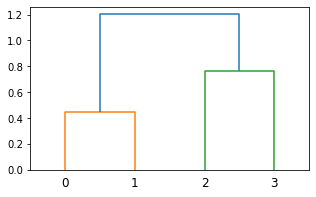

In [13]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define the distance matrix
dis_matrix = np.array([[0, 0.3, 0.4, 0.7],
                  [0.3, 0, 0.5, 0.8],
                  [0.4, 0.5, 0.0, 0.45],
                  [0.7, 0.8, 0.45, 0.0]])
                  
# Compute hierarchical clustering and plot the dendrogram
Z = linkage(dis_matrix, method='complete')
fig = plt.figure(figsize=(5,3))
dn = dendrogram(Z)
plt.show()

#### b) Repeat (a), this time using simple linkage clustering.

C:\Users\Haoran Zhang\AppData\Local\Temp\ipykernel_25940\1062976236.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dis_matrix, method='single')


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.4472135954999579, 0.4472135954999579, 0.0],
  [0.0, 0.65, 0.65, 0.4472135954999579],
  [0.0, 0.7648529270389177, 0.7648529270389177, 0.65]],
 'ivl': ['4', '3', '1', '2'],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

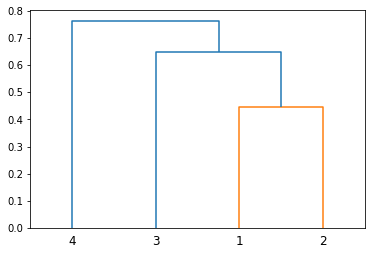

In [14]:
# Compute hierarchical clustering and plot the dendrogram
linkage_matrix = linkage(dis_matrix, method='single')
dendrogram(linkage_matrix, color_threshold=0.5, labels=['1', '2', '3', '4'])

#### c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster ?

### <span style='color:blue '>  In this case, we have clusters (1,2) and (3,4).<span>

#### d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster ?

### <span style='color:blue '>  In this case, we have clusters ((1,2),3) and (4).<span>

#### e) Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

C:\Users\Haoran Zhang\AppData\Local\Temp\ipykernel_25940\4063453816.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dis_matrix, method='complete')


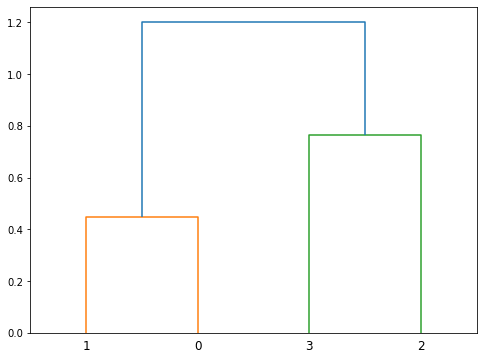

In [15]:
Z = linkage(dis_matrix, method='complete')
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=[1,0,3,2])
plt.show()